In [1]:
import spacy

# Load medium spaCy model (has word vectors)
nlp = spacy.load("en_core_web_md")
    # python -m spacy download en_core_web_md
    # one time

# Check Model Metadata
print(nlp.meta["vectors"])
    # {'width': 300, 'vectors': 20000, 'keys': 684830, 'name': 'en_vectors', 'mode': 'default'}

{'width': 300, 'vectors': 20000, 'keys': 684830, 'name': 'en_vectors', 'mode': 'default'}


In [8]:
import spacy
nlp = spacy.load("en_core_web_md")

word = "cat"

# getting word id in the vocabulary of spacy model
word_id = nlp.vocab.strings[word]
    # 5439657043933447811

# getting word vector using word id from the model
word_vector = nlp.vocab.vectors[word_id]
    #     array([-0.72483  ,  0.42538  ,  ...  0.28165  ], dtype=float32)

len(word_vector)
    # 300
    # that is 300 parameters to measure a word
    # as well 300 characteristics defined for a word (columns)


300

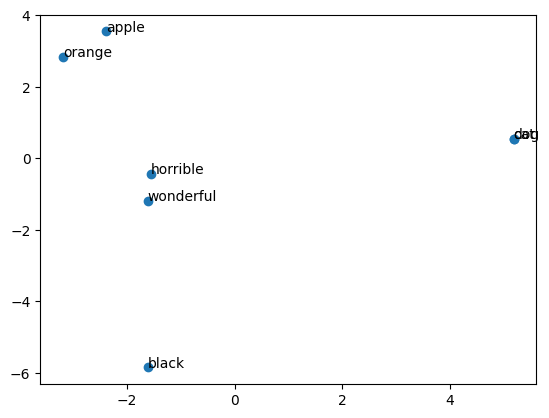

In [72]:
# Word Vector Visualization

import spacy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

spacy.load("en_core_web_md")

# words to visualize
words = ["wonderful", "horrible", "apple", "orange", "black", "dog", "cat"]
word_vectors = []

for word in words:
    word_id = nlp.vocab.strings[word]
    word_vector = nlp.vocab.vectors[word_id]
    word_vectors.append(word_vector)

word_vectors
"""
[
    array([-0.76677 ,  0.52154 ,  0.51221 ,  0.17084 ,  0.022783,  ...], dtype=float32),
        ... ,
    array([-0.72483 ,  0.42538 ,  0.025489, -0.39807 ,  0.037463,  ...], dtype=float32)
]
"""


# Stack vectors for PCA
stacked_arr = np.vstack(word_vectors)
    # converts the vector of vectors to a 2d array
"""
 array([[-0.76677  ,  0.52154  ,  0.51221  ,  0.17084  ,  0.022783 ],
        [-0.71302  ,  0.090462 ,  0.36503  , -0.14336  ,  0.0035745],
        [-0.6334   ,  0.18981  , -0.53544  , -0.52658  , -0.30001  ],
        [-0.63358  ,  0.12266  ,  0.47232  , -0.22974  , -0.26307  ],
        [-0.62299  , -0.31332  , -0.014659 ,  0.14449  , -0.143    ],
        [-0.72483  ,  0.42538  ,  0.025489 , -0.39807  ,  0.037463 ],
        [-0.72483  ,  0.42538  ,  0.025489 , -0.39807  ,  0.037463 ]],
        dtype=float32)
"""

# Applying PCA to reduce to 2 dimension
pca = PCA(n_components=2)
arr_2d = pca.fit_transform(stacked_arr)

arr_2d
"""
 array([[ 0.5590943 ,  0.19645803],
        [ 0.2405029 , -0.07239293],
        [-0.75937706, -0.01141524],
        [ 0.24359024, -0.06513336],
        [ 0.00264516, -0.630934  ],
        [-0.1432277 ,  0.29170877],
        [-0.1432277 ,  0.29170877]], dtype=float32)
"""

# Visualize

x = arr_2d[:,0]
y = arr_2d[:,1]

for i, word in enumerate(words):
    plt.text(x[i], y[i], word)

plt.scatter(x,y)
plt.show()



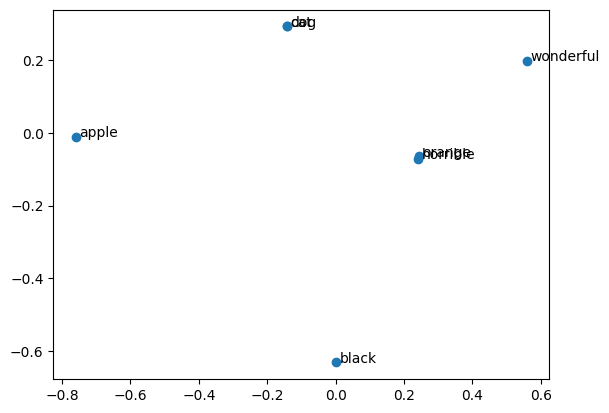

np.float32(1.1509395)

In [ ]:

# Find Similar Words
import spacy
nlp = spacy.load("en_core_web_md")

target_word = "cat"
target_id = nlp.vocab.strings[target_word]
target_vector = nlp.vocab.vectors[target_id]

similar_words = nlp.vocab.vectors.most_similar(target_vector.reshape(1,300), n=5) 
similar_words
    # target vector reshapping is required
    # default shape (300,)
    # convert it into 2d as (1,300)
    # n = 5 returns 5 similar words

    # output contains tuple of 3 vectors
        # 1st vector are the word ids
        # 2nd vector are the vector ids
        # 3rd vector is the value of cosine similarity
"""
    (array([[12208289099836549209, 17719488375152474849,  8875935456354591630, 13481877704469139785, 18059933654817027899]], 
        dtype=uint64), 
    array([[16706, 16704, 16705, 10160, 10159]], 
        dtype=int32), 
    array([[1.    , 1.    , 1.    , 0.7471, 0.7471]], 
        dtype=float32))
"""

for word_id in similar_words[0][0]:
    word = nlp.vocab.strings[word_id]
    print(word)
"""
    pooch
    CHINCHILLA
    CORGI
    adopt
    cattery
"""


pooch
CHINCHILLA
CORGI
adopt
cattery


pooch
CHINCHILLA
CORGI
adopt
cattery


In [105]:
help(nlp.vocab.vectors.most_similar)

Help on method most_similar in module spacy.vectors:

most_similar(queries, *, batch_size=1024, n=1, sort=True) method of spacy.vectors.Vectors instance
    Vectors.most_similar(self, queries, *, batch_size=1024, n=1, sort=True)
    For each of the given vectors, find the n most similar entries
    to it, by cosine.
    
    Queries are by vector. Results are returned as a `(keys, best_rows,
    scores)` tuple. If `queries` is large, the calculations are performed in
    chunks, to avoid consuming too much memory. You can set the `batch_size`
    to control the size/space trade-off during the calculations.
    
    queries (ndarray): An array with one or more vectors.
    batch_size (int): The batch size to use.
    n (int): The number of entries to return for each query.
    sort (bool): Whether to sort the n entries returned by score.
    RETURNS (tuple): The most similar entries as a `(keys, best_rows, scores)`
        tuple.



In [ ]:
type(target_vector)
target_vector.shape
type(np.asarray(target_vector))
np.asarray(target_vector).shape

## Symantic Similarity

In [ ]:
import spacy
nlp = spacy.load("en_core_web_md")

# texts
text1 = "We eat Pizza"
text2 = "We like to eat Pasta"

# docs
doc1 = nlp(text1)
doc2 = nlp(text2)



# Tokens Similarity check
pizza_token = doc1[2]   # Pizza
pasta_token = doc2[4]   # Pasta

token_similarity = pizza_token.similarity(pasta_token)
token_similarity                    # note similarity uses cosine similarity (using dot product)
    # 1.0   
    # that's highly likely



# Span Similarity Check
span1 = doc1[1:]    # eat Pizza
span2 = doc2[1:]    # like to eat Pasta
span3 = doc2[3:]    # eat Pasta

span_similarity_12 = span1.similarity(span2)
    # 0.8831702470779419 
    # that is likely equivalent
span_similarity_13 = span1.similarity(span3)
    # 1.0
    # that is even more likely
span_similarity_23 = span2.similarity(span3)
    # 0.8831702470779419
    # that is likely equivalent



# Doc similarity
doc_similarity = doc1.similarity(doc2)
doc_similarity
    # 0.9268936514854431
    # highly likely



# Sentence Similarity for keyword Relevance
keyword = "cancel"
questions = [
    "What is the cheapest flight from Boston to Seattle?",
    "How do I change my booking?",
    "What are your refund policies?"
]

# converting to nlp doc object
keyword = nlp(keyword)
questions = [nlp(question) for question in questions]

for ques in questions:
    ques_similarity = ques.similarity(keyword)
    print(ques_similarity)

"""
    0.326357901096344               1st ques is less likely to cancelling flight
    0.40321826934814453             2nd ques is about changing flight
    0.611201286315918               3rd ques is about refund, that's most likely to key 
"""



0.326357901096344
0.40321826934814453
0.611201286315918
